In [11]:
import pandas as pd

csv_file = 'data/TIGIT CYTO_MA 3202024.xlsx'
df_mfi = pd.read_excel(csv_file, sheet_name="MFI")
df_tigit = pd.read_excel(csv_file, sheet_name="TIGIT")

In [12]:
df_mfi.iloc[:, 1:] = df_mfi.iloc[:, 1:].apply(lambda x: x.mask(x < 0, 0))

In [13]:
display(df_mfi.head())
display(df_tigit.head())

,group,IFNγ,IL1β,IL4,IL5,IL10,IL13,IL17
0,Control mMDSCs,8879,34764,42074,12041,6900,93747,17623
1,dBT114 mMDSCs,8035,26608,21000,11972,6353,123578,15706
2,dBT116 mMDSCs,4064,24654,98004,10048,5361,101356,13171
3,dBT120 mMDSCs,11615,29487,14816,10622,6644,114837,16468
4,Control NCM,5914,47786,22703,12714,6394,62471,11931


,group,IFNγ,IL1β,IL4,IL5,IL10,IL13,IL17
0,Control mMDSCs,39.30,4.9,18.50,14.00,20.80,50.3,10.20
1,dBT114 mMDSCs,12.30,33.4,17.10,42.10,7.39,81.9,0.84
2,dBT116 mMDSCs,10.70,18.3,10.60,24.20,4.50,53.1,2.79
3,dBT120 mMDSCs,8.11,32.0,3.73,49.00,12.90,74.8,2.32
4,Control NCM,42.70,4.8,32.90,8.24,16.60,35.1,4.78


# Normalize

Normalize the expression of cytokines from range of 0-1

In [14]:
cytokine_cols = df_mfi.columns[1:]
cytokine_cols

Index(['IFNγ', 'IL1β', 'IL4', 'IL5', 'IL10', 'IL13', 'IL17'], dtype='object')

In [15]:
df_mfi.loc[:, cytokine_cols].max().max()

123578

In [16]:
for col in cytokine_cols:
  df_mfi[col] = df_mfi[col].astype('float64')

In [17]:
df_mfi.loc[:, cytokine_cols] = df_mfi.loc[:, cytokine_cols] / df_mfi.loc[:, cytokine_cols].max().max()

In [18]:
markers = df_mfi.columns[1:].to_list()
groups = df_mfi['group'].to_list()

data = []
for gid, group in enumerate(groups):
  for mid, marker in enumerate(markers):
    data.append([group, marker, df_mfi.iat[gid, mid+1], df_tigit.iat[gid, mid+1]])
df = pd.DataFrame(data, columns=['group', 'marker', 'MFI', 'cells (%)'])
df.head()

,group,marker,MFI,cells (%)
0,Control mMDSCs,IFNγ,0.071849,39.3
1,Control mMDSCs,IL1β,0.281312,4.9
2,Control mMDSCs,IL4,0.340465,18.5
3,Control mMDSCs,IL5,0.097436,14.0
4,Control mMDSCs,IL10,0.055835,20.8


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
sns.set_theme(style='whitegrid')
# sns.set_context("notebook", font_scale=1.5)

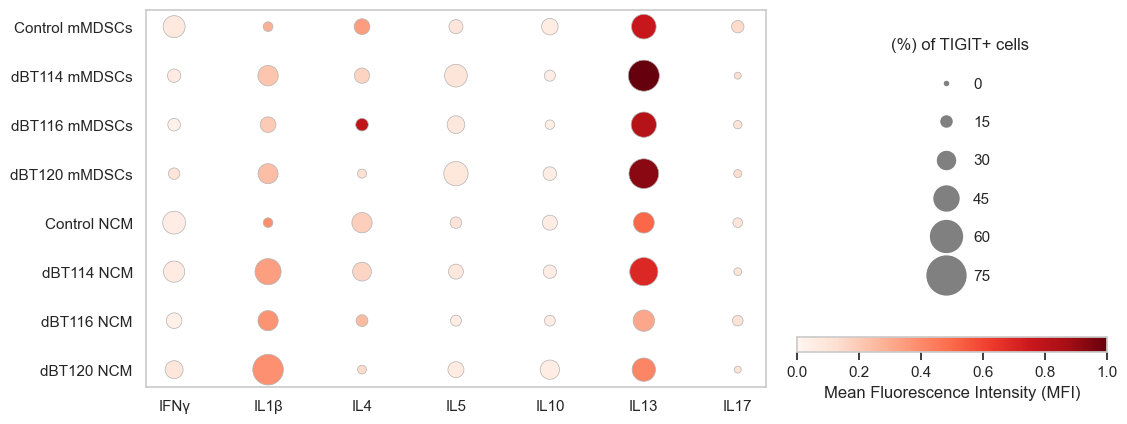

In [20]:
from matplotlib.lines import Line2D

norm_tigit = plt.Normalize(0, df['cells (%)'].max())
norm_mfi = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm_mfi)

plt.figure(figsize=(8, 7))
g = sns.scatterplot(
  data=df,
  x='marker', y='group', size='cells (%)', hue='MFI',
  palette="Reds", hue_norm=norm_mfi, edgecolor=".7",
  sizes=(20, 500), size_norm=norm_tigit,
)
g.set(xlabel="", ylabel="")
g.grid(False)
g.figure.colorbar(sm, 
                  ax=g, orientation='horizontal', 
                  shrink=0.5, anchor=(2.1, 3),
                  label='Mean Fluorescence Intensity (MFI)')
legend_elements = [
  Line2D([0], [0], marker='o', color='w', label=0, markerfacecolor='grey', markersize=5),
  Line2D([0], [0], marker='o', color='w', label=15, markerfacecolor='grey', markersize=10),
  Line2D([0], [0], marker='o', color='w', label=30, markerfacecolor='grey', markersize=15),
  Line2D([0], [0], marker='o', color='w', label=45, markerfacecolor='grey', markersize=20),
  Line2D([0], [0], marker='o', color='w', label=60, markerfacecolor='grey', markersize=25),
  Line2D([0], [0], marker='o', color='w', label=75, markerfacecolor='grey', markersize=30),
]
legend = g.legend(
    handles=legend_elements,
    labelspacing=1.6,
    frameon=False,
    loc='center left', 
    bbox_to_anchor=(1.18, 0.6), 
    title='(%) of TIGIT+ cells')
plt.show()